# SVM

$Ousmane$      $KA$


### Importations

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from bing_image_downloader import downloader
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle
from pyngrok import ngrok
import streamlit as st
import cv2

### CREATE Classification_Images FOLDER

In [7]:
%mkdir Images

### Download Striga plants images using Bing_downloader

In [10]:
downloader.download("striga plant",limit=30,output_dir="Images",adult_filter_off=True)

[%] Downloading Images to C:\Users\LENOVO\Desktop\Image_Classification\Images\striga plant


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://www.zimbabweflora.co.zw/speciesdata/images/15/152290-4.jpg
[!] Issue getting: http://www.zimbabweflora.co.zw/speciesdata/images/15/152290-4.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1125)>
[%] Downloading Image #1 from https://live.staticflickr.com/4011/4647051311_45823177af_b.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://agro.biodiver.se/wp-content/uploads/2012/01/Striga-close-up-5.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://live.staticflickr.com/4092/4953680345_10cf9bd1c7_b.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://static.teline.fr/upload/orobanchaceae/striga-barthlottii/150127211825/striga-barthlottii-photo9.jpg
[%] File Downloaded !

[%] Downloading Image #5

### Download Healthy plants images using Bing_downloader

In [22]:
downloader.download("mil mais sorgho plantes wikimedia",limit=30,output_dir="Images",adult_filter_off=True)

[%] Downloading Images to C:\Users\LENOVO\Desktop\Image_Classification\Images\mil mais sorgho plantes wikimedia


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://cdn.futura-sciences.com/buildsv6/images/wide1920/7/7/b/77bb0eb050_76815_millet-canon-1069.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://fr.cdn.v5.futura-sciences.com/buildsv6/images/wide1920/6/d/5/6d5dd23060_109068_12-1069.jpg
[!] Issue getting: https://fr.cdn.v5.futura-sciences.com/buildsv6/images/wide1920/6/d/5/6d5dd23060_109068_12-1069.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1125)>
[%] Downloading Image #2 from https://fr.cdn.v5.futura-sciences.com/buildsv6/images/wide1920/8/3/8/838c13b8aa_109065_09-1069.jpg
[!] Issue getting: https://fr.cdn.v5.futura-sciences.com/buildsv6/images/wide1920/8/3/8/838c13b8aa_109065_09-1069.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FA

[%] File Downloaded !

[%] Downloading Image #8 from https://fr.cdn.v5.futura-sciences.com/buildsv6/images/wide1920/9/5/6/95663f4d46_109067_11-1069.jpg
[!] Issue getting: https://fr.cdn.v5.futura-sciences.com/buildsv6/images/wide1920/9/5/6/95663f4d46_109067_11-1069.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1125)>
[%] Downloading Image #8 from http://moulindelamousquere.pagesperso-orange.fr/images/mali-cereales/sorgho3.jpg
[!] Issue getting: http://moulindelamousquere.pagesperso-orange.fr/images/mali-cereales/sorgho3.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #8 from https://www.consoglobe.com/wp-content/uploads/2015/05/millet-céréale-bienfaits-nutritifs-sans-gluten-ban.jpg
[!] Issue getting: https://www.consoglobe.com/wp-content/uploads/2015/05/millet-céréale-bienfaits-nutritifs-sans-gluten-ban.jpg
[!] Error:: 'ascii' codec can't encode character '\xe9' in position 40: ordinal not in r

[!] Issue getting: https://www.reseau-astria.fr/files/Upload/Essais/mais-grain..jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1125)>
[%] Downloading Image #18 from https://cdn.futura-sciences.com/buildsv6/images/mediumoriginal/e/b/4/eb4ab9e8db_17956_10341-012-mil.jpg
[%] File Downloaded !



[!!]Indexing page: 5

[%] Indexed 30 Images on Page 5.


[%] Downloading Image #19 from https://aistoucuisine.com/wp-content/uploads/2017/10/DSC_3581-1024x747.jpg
[!] Issue getting: https://aistoucuisine.com/wp-content/uploads/2017/10/DSC_3581-1024x747.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1125)>
[%] Downloading Image #19 from https://www.melkvee.nl/site/assets/files/0/62/133/e2ce26d27.-detail.jpg
[%] File Downloaded !

[%] Downloading Image #20 from https://edwintucker.co.uk/wordpress/wp-content/uploads/2019/03/Sorghum1-600x291.jpg
[!] Is

In [3]:
target=[]
flat_data=[]
images=[]
DataDirectory="C:\\Users\\LENOVO\\Desktop\\ImageClassifier\\Images"
Categories=["Striga Plants","Healthy Plants"]
for i in Categories:
    print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
    #Encode categories: Healthy_millet as 0 and Non_Healthy_millet as 1.
    target_class=Categories.index(i)
    #Create data path for all folders under MinorProject
    path=os.path.join(DataDirectory,i)
    #Resize images to ensure all images are of same dimensions
    for img in os.listdir(path):
        if img.endswith((".png", ".jpg", ".jpeg")):
            #img_array contains matrix of all images in the path
            img_array=cv2.imread(os.path.join(path,img),0)
            #plt.imshow(img_array) show images from the path
            #Skimage normalises the value of the image
            img_resized=resize(img_array,(150,150,3))
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(target_class)
#Convert list to numpy array format
flat_data=np.array(flat_data)
images=np.array(images)
target=np.array(target)

Category is: Striga Plants 	Label encoded as: 0
Category is: Healthy Plants 	Label encoded as: 1


### Create DATAFRAME

In [4]:
df=pd.DataFrame(flat_data)
#Create a column for output data called Target
df['Target']=target
#Rows are all the input images(60 images,30 of each category)
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.349216,0.349216,0.349216,0.325739,0.325739,0.325739,0.314621,0.314621,0.314621,0.309804,...,0.459163,0.459163,0.459163,0.467007,0.467007,0.467007,0.474850,0.474850,0.474850,0
1,0.244105,0.244105,0.244105,0.258850,0.258850,0.258850,0.282301,0.282301,0.282301,0.286275,...,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0
2,0.371595,0.371595,0.371595,0.356863,0.356863,0.356863,0.376471,0.376471,0.376471,0.406680,...,0.279281,0.279281,0.279281,0.267545,0.267545,0.267545,0.303757,0.303757,0.303757,0
3,0.444627,0.444627,0.444627,0.467765,0.467765,0.467765,0.497647,0.497647,0.497647,0.523979,...,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0.207843,0
4,0.854902,0.854902,0.854902,0.856863,0.856863,0.856863,0.860458,0.860458,0.860458,0.862745,...,0.311111,0.311111,0.311111,0.316993,0.316993,0.316993,0.307843,0.307843,0.307843,0
5,0.579248,0.579248,0.579248,0.516176,0.516176,0.516176,0.651634,0.651634,0.651634,0.641503,...,0.640033,0.640033,0.640033,0.550490,0.550490,0.550490,0.478595,0.478595,0.478595,0
6,0.685621,0.685621,0.685621,0.838235,0.838235,0.838235,0.939216,0.939216,0.939216,0.973856,...,0.391830,0.391830,0.391830,0.413725,0.413725,0.413725,0.472222,0.472222,0.472222,0
7,0.455333,0.455333,0.455333,0.465346,0.465346,0.465346,0.460839,0.460839,0.460839,0.458170,...,0.337255,0.337255,0.337255,0.336588,0.336588,0.336588,0.326575,0.326575,0.326575,0
8,0.560902,0.560902,0.560902,0.498431,0.498431,0.498431,0.419216,0.419216,0.419216,0.344706,...,0.361176,0.361176,0.361176,0.451843,0.451843,0.451843,0.481176,0.481176,0.481176,0
9,0.521895,0.521895,0.521895,0.203922,0.203922,0.203922,0.105882,0.105882,0.105882,0.107843,...,0.447386,0.447386,0.447386,0.180719,0.180719,0.180719,0.117647,0.117647,0.117647,0


### Display one resized image as a test

AxesImage(54,36;334.8x217.44)


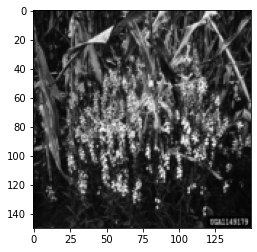

In [5]:
print(plt.imshow(images[18]))

### Verify that all categories have 30 images

<BarContainer object of 2 artists>

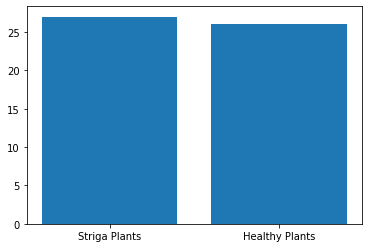

In [6]:
unique,count=np.unique(target,return_counts=True)
plt.bar(Categories,count)

### Test and Train Dataset Creation using Sklearn Library function

In [7]:
#1)Data is first split into input and output
#2)Input and Output are further split into testing and training data,individually
#x is all input values of images and their pixel values(100 images * 67500)
#y is output values or correct label of images(100 images * 1 column of labels)
x=df.iloc[:,:-1].values #or x= flat_data
y=target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)
#Stratify ensures every image is divided in equal proportions(no bias)
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True,test_size=0.30,random_state=109,stratify=y)
print("Dimension of input training data:",x_train.shape)
print("Dimension of input testing data:",x_test.shape)
print("Dimension of output training data:",y_train.shape)
print("Dimension of output testing data:",y_test.shape)
#Check if testing and training data are divided in equal proportions
print("Label \t\t Image index considered")
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

Input data dimensions: (53, 67500)
Output data dimensions: (53,)
Dimension of input training data: (37, 67500)
Dimension of input testing data: (16, 67500)
Dimension of output training data: (37,)
Dimension of output testing data: (16,)
Label 		 Image index considered
(array([0, 1]), array([19, 18], dtype=int64))
(array([0, 1]), array([8, 8], dtype=int64))


### FIND BEST PARAMETERS

In [8]:
krn=['linear','rbf','sigmoid']
rng_C=np.arange(1,52,10)
rng_deg=np.arange(3,8)
rng_co=np.arange(0.001,10,0.5)
rng_gam=['auto','scale']
best_score=0
for i in krn:
    for j in rng_C:
        for k in rng_deg:
            for z in rng_co:
                for x in rng_gam:
                    cv=SVC(kernel=i,degree=k,coef0=z,gamma=x,C=j)
                    cv.fit(x_train,y_train)
                    ac4=accuracy_score(cv.predict(x_test),y_test)
                    if best_score<ac4:
                        best_score=ac4
                        bi=i
                        bk=k
                        bj=j
                        bz=z
                        bx=x
print(best_score,bi,bj,bk,bz,bx)

0.75 linear 1 3 0.001 auto


### CLASSIFICATION USING SVM

#### 1st Test

In [9]:
#Applying Support Vector Machine Classifier
#Set the parameters by cross_validation
tuned_parameters=[{'kernel':['rbf'],'gamma':[1e-3, 1e-4],'C':[1,10,100,1000]}]
#Apply GridSearchCV to find the best parameters for given dataset
#verbose is used to describe the steps taken to find best parameters
cv=GridSearchCV(SVC(probability=True),tuned_parameters,refit=True,verbose=3)
cv.fit(x_train,y_train)
#Display parameters selected by GridSearchCV for SVM 2 classes
#Parameters obtained:{'C':10,'gamma':0.0001,'kernel':'rbf'}
print("Best parameters to apply are:",cv.best_params_)
#Display model after  hyperparameter tuning
svm=cv.best_estimator_
print("Model after tuning is:\n",svm)
#Predict the output of model after above parameters are applied to it
y_prediction=svm.predict(x_test)
#Print expected and predicted outputs
print("Expected results:",y_test)
print("Predicted results:",y_prediction)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV 2/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV 3/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV 4/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV 5/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV 1/5] END ..................C=1, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 2/5] END ..................C=1, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 3/5] END ..................C=1, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 4/5] END ..................C=1, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 5/5] END ..................C=1, gamma=0.0001, kernel=rbf; total time=   0.2s
[CV 1/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.2s
[CV 2/5] END ..................C=10, gamma=0.001,

#### 2nd Test

In [10]:
#Applying Support Vector Machine Classifier
#Set the parameters by cross_validation
tuned_parameters=[{'kernel':['linear'],'degree':[3],'coef0':[0.001],'gamma':['auto'],'C':[1]}]
#Apply GridSearchCV to find the best parameters for given dataset
#verbose is used to describe the steps taken to find best parameters
cv=GridSearchCV(SVC(probability=True),tuned_parameters,refit=True,verbose=3)
cv.fit(x_train,y_train)
#Display parameters selected by GridSearchCV for SVM 2 classes
#Parameters obtained:{'C':10,'gamma':0.0001,'kernel':'rbf'}
print("Best parameters to apply are:",cv.best_params_)
#Display model after  hyperparameter tuning
svm=cv.best_estimator_
print("Model after tuning is:\n",svm)
#Predict the output of model after above parameters are applied to it
y_prediction=svm.predict(x_test)
#Print expected and predicted outputs
print("Expected results:",y_test)
print("Predicted results:",y_prediction)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=linear; total time=   0.1s
[CV 2/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=linear; total time=   0.1s
[CV 3/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=linear; total time=   0.1s
[CV 4/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=linear; total time=   0.1s
[CV 5/5] END C=1, coef0=0.001, degree=3, gamma=auto, kernel=linear; total time=   0.1s
Best parameters to apply are: {'C': 1, 'coef0': 0.001, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
Model after tuning is:
 SVC(C=1, coef0=0.001, gamma='auto', kernel='linear', probability=True)
Expected results: [0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0]
Predicted results: [1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0]


**!!!The second test has a better accuracy so we will work with it**

### EVALUATION OF MODEL

In [11]:
#1)PRECISION measures how many positives were actually positive(Positive predictive ability)
#2)RECALL measures how many positives were correctly predicted(True positive rate)
#3)CONFUSION MATRIX is a square matrix where rows are true(expected labels) and columns are predicted labels
#4)ACCURACY measures correctly classified data vs total data
print("Confusion Matrix results:\n",confusion_matrix(y_prediction,y_test))
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Confusion Matrix results:
 [[6 2]
 [2 6]]

Classification report of model:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.75      0.75      0.75         8

    accuracy                           0.75        16
   macro avg       0.75      0.75      0.75        16
weighted avg       0.75      0.75      0.75        16

Accuracy score: 75.0


### SAVE MODEL USING PICKLE LIBRARY

In [12]:
#Save SVM model in pickle file(write byte)
pickle.dump(svm,open("Classification_Model.p","wb"))
#Read byte from pickle model(load model)
test_model=pickle.load(open("Classification_Model.p","rb"))

### TESTING FOR A NEW IMAGE

Enter url of image to test:https://weeds.brisbane.qld.gov.au/sites/default/files/styles/large/public/images/54e2d5_2ff2c312eec847c2b339de5ec1b77b41_mv2_d_1600_1200_s_2.jpg?itok=-jfBFKjy
Dimensions of original image are: (426, 568, 3)
PREDICTED OUTPUT IS: Striga Plants


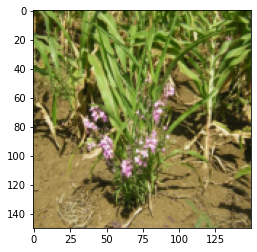

In [19]:
flat_data=[]
url=input("Enter url of image to test:")
img_array=imread(url)
#Resize image
img_resized=resize(img_array,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output=test_model.predict(flat_data)
y_output=Categories[y_output[0]]
print("PREDICTED OUTPUT IS:",y_output)

### DEPLOYMENT: (Not a must so we will ignore it)

In [63]:
# %%writefile img_class.py
# #Let's create a web app using streamlit
# #Importations
# import streamlit as st
# import numpy as np
# from skimage.io import imread
# from skimage.transform import resize
# import pickle
# from PIL import Image
# #SETUP WEB APP
# st.set_option('deprecation.showfileUploaderEncoding', False)
# st.title('Image Classifier using Support Vector Machine')
# st.text("Upload the image")
# test_model=pickle.load(open("Classification_Model.p","rb"))
# #UPLOAD A FILE
# uploaded_file=st.file_uploader("Choose an image ...",type="jpg")
# if uploaded_file is not None:
#     img=Image.open(uploaded_file)
#     st.image(img,caption="Uploaded Image")
#     if st.button("PREDICT"):
#         Categories=["Healthy millet","Non Healthy millet"]
#         st.write("Result...")
#         img=np.array(img)
#         img_resized=resize(img,(150,150,3))
#         flat_data.append(img_resized.flatten())
#         flat_data=np.array(flat_data)
#         print("Dimensions of original image are:",img_array.shape)
#         y_output=test_model.predict(flat_data)
#         y_output=Categories[y_output[0]]
#         st.title("PREDICTED OUTPUT IS: ",y_output)
#         #PROBABILITIES
#         a=test_model.predict_proba(flat_data)
#         for index,item in enumerate(Categories):
#             st.write(f'{item}:{q[0][index]*100}%')

In [64]:
# # run the web app in the background
# !nohup streamlit run img_class.py &
# url=ngrok.connect(port="8501")
# url
# #Copy the link obtained after excecution and past it on your website browser to view your web app

$OUSOKA$

# FIN